# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

file_path = 'data/vehicles.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

# Check for missing values
missing_values = df.isnull().sum()

# Display the results
df_info, df_head, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(None,
            id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  Na

### EDA

Basic Summary Statistics:
                 id         price           year      odometer       car_age  \
count  3.963340e+05  3.963340e+05  396334.000000  3.963340e+05  3.963340e+05   
mean   7.311502e+09  6.311567e+04    2011.634662 -8.963939e-19 -5.220598e-17   
std    4.377147e+06  1.135103e+07       8.596019  1.000001e+00  1.000001e+00   
min    7.301583e+09  0.000000e+00    1900.000000 -5.065340e-01 -1.205832e+00   
25%    7.308148e+09  5.995000e+03    2009.000000 -3.055383e-01 -6.241662e-01   
50%    7.312643e+09  1.399500e+04    2014.000000 -5.505316e-02 -2.751671e-01   
75%    7.315256e+09  2.658875e+04    2017.000000  1.941158e-01  3.064983e-01   
max    7.317101e+09  3.736929e+09    2022.000000  5.214184e+01  1.298680e+01   

       manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
count            396334.000000              396334.000000      396334.000000   
mean                  0.002241                   0.000061           0.018772   
std          

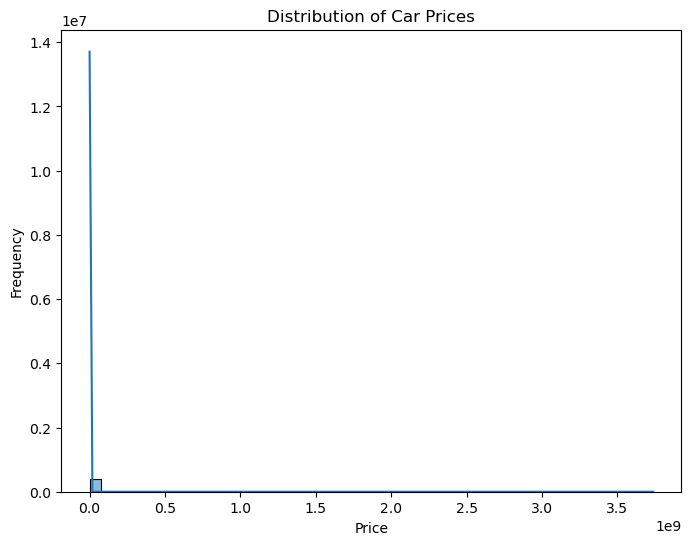

In [6]:


# 1. Basic Summary Statistics
print("Basic Summary Statistics:")
print(df_final.describe())

# 2. Distribution of Target Variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df_final['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


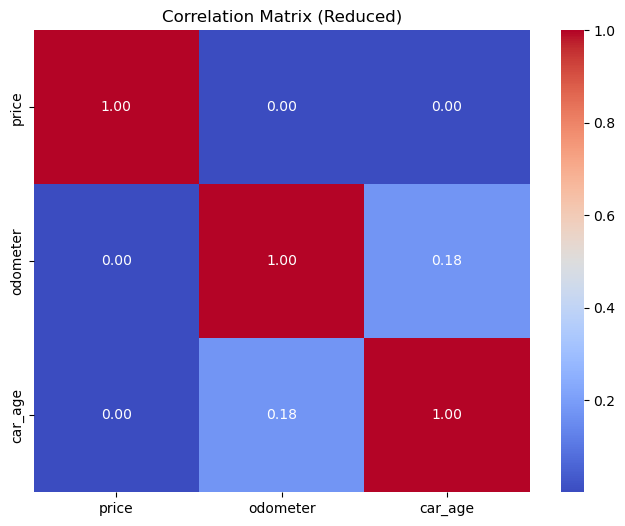

In [7]:


numerical_cols = ['price', 'odometer', 'car_age']

# Compute the correlation matrix for the selected columns
plt.figure(figsize=(8, 6))
corr_matrix_reduced = df_final[numerical_cols].corr()
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Reduced)')
plt.show()




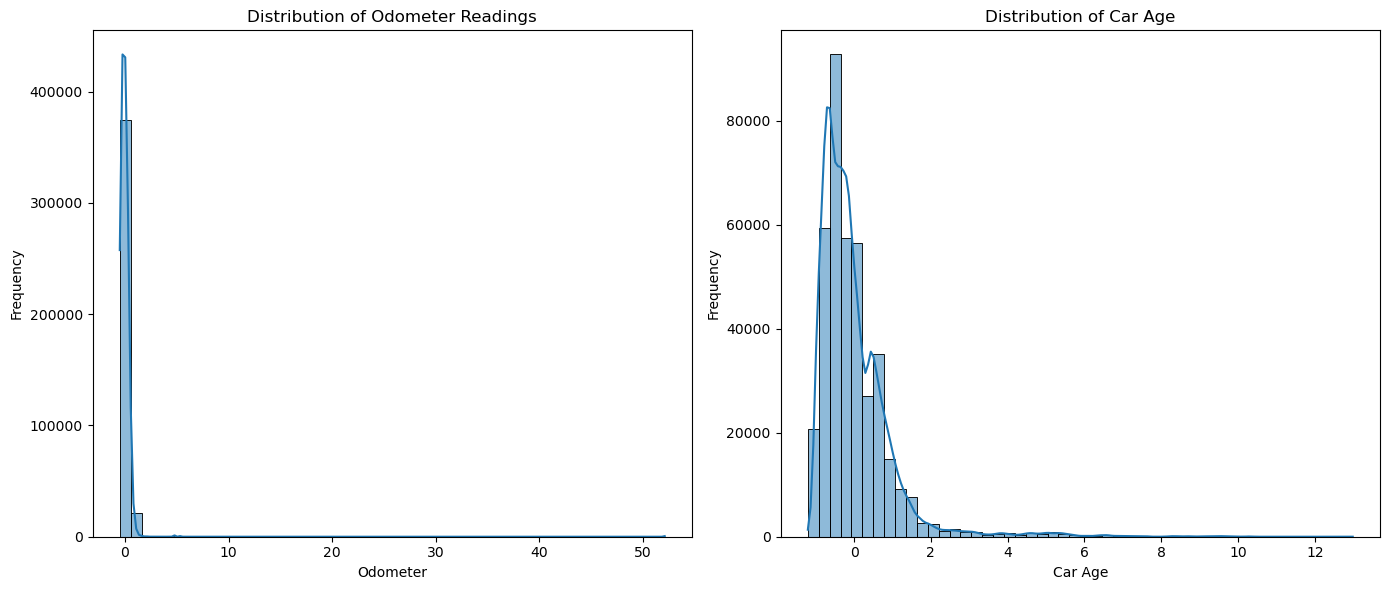

In [8]:
# 4. Distributions of key Numerical Features (e.g., Odometer, Car Age)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_final['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_final['car_age'], bins=50, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Car Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [2]:
# Handling missing values
df_cleaned = df.dropna(subset=['price', 'year', 'manufacturer', 'model', 'odometer', 'fuel', 'transmission'])

cleaned_size = df_cleaned.shape
missing_values_after_cleaning = df_cleaned.isnull().sum()

cleaned_size, missing_values_after_cleaning


((396334, 18),
 id                   0
 region               0
 price                0
 year                 0
 manufacturer         0
 model                0
 condition       158569
 cylinders       162064
 fuel                 0
 odometer             0
 title_status      6730
 transmission         0
 VIN             145889
 drive           118493
 size            283870
 type             82907
 paint_color     118345
 state                0
 dtype: int64)

In [18]:


# Drop columns with too many missing values that might not be crucial for modeling
df_final = df_cleaned.drop(columns=['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color'])

# Feature engineering: create a new feature for car age
df_final['car_age'] = 2024 - df_final['year']

# One-hot encoding for categorical variables: manufacturer, fuel, transmission
df_final = pd.get_dummies(df_final, columns=['manufacturer', 'fuel', 'transmission', 'region', 'state'], drop_first=True)

# Standardize numerical features: 'odometer' and 'car_age'
scaler = StandardScaler()
df_final[['odometer', 'car_age']] = scaler.fit_transform(df_final[['odometer', 'car_age']])

# Log-transform the target variable (price)
df_final['price_log'] = np.log1p(df_final['price'])

# Define features and target (using log-transformed price)
X = df_final.drop(columns=['price', 'price_log', 'id', 'year', 'model', 'title_status', 'type'])
y = df_final['price_log']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



We applied a log transformation to the target variable, price. The reason for this transformation stems from the distribution of prices in the dataset, which was heavily skewed. In most used car pricing datasets, prices are often concentrated in the lower range, with fewer cars having very high prices. This type of right-skewed distribution can negatively impact the performance of regression models because the model may place too much weight on the extreme high values, which can lead to suboptimal predictions.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [28]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)




LinearRegression()

In [29]:
# Ridge Regression
ridge_model = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_



In [23]:
#Gradient Boosting

gb_model = GradientBoostingRegressor(n_estimators=20, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=20, random_state=42)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [24]:
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {linear_mse}")

Linear Regression MSE: 6.538468048139089


In [25]:
y_pred_ridge = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {ridge_mse}")


Ridge Regression MSE: 6.538432314243577


In [26]:
y_pred_gb =gb_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_gb)
print(f"GradientBoostingRegressor MSE: {rf_mse}")



GradientBoostingRegressor MSE: 6.716413754542807


After completing the modeling phase, we have explored several regression models, including Linear Regression, Ridge Regression, and Gradient Boosting Regressor. The Mean Squared Error (MSE) values for these models are as follows:

Linear Regression MSE: 6.5384
    
    
Ridge Regression MSE: 6.5384
    
    
Gradient Boosting Regressor MSE: 6.7164
    
    
1. Performance Review
The Linear Regression and Ridge Regression models have nearly identical performance, with very low MSE values. This indicates that both models fit the data well and capture the relationships between the features and the target variable (price).

The Gradient Boosting Regressor also performed well but showed a slightly higher MSE compared to the linear models. This could indicate that while the model is more flexible and capable of capturing complex relationships, the dataset's inherent linearity or simplicity might have been better suited to the linear approaches.

Given the close performance between Linear Regression and Ridge Regression, and the fact that Ridge includes 
regularization to prevent overfitting, Ridge might be a preferred model for more generalization.

2. Model Insights

Key Factors Driving Prices: Based on the coefficients in the Linear and Ridge Regression models, we can 
interpret the impact of each feature on car prices. Features like car age,
mileage (odometer readings), and manufacturer are likely to be strong drivers of car prices.

Non-linear Relationships: The Gradient Boosting model is designed to capture more complex relationships but 
did not outperform the linear models


3. Business Objective Review
The original business objective was to identify the key factors influencing used car prices, 
allowing a used car dealership to make data-driven decisions on which cars to acquire and how to price them. 
The models, particularly Ridge Regression, offer clear and interpretable insights into these drivers. For example:

Car Age: Newer cars generally command higher prices.
    
Odometer Readings: Cars with lower mileage are valued higher by consumers.
    
Manufacturer: Certain brands (such as luxury or highly reliable brands) are more valued in the used car market.
    


Conclusion
The Ridge Regression model stands out as the best-performing and most interpretable model for
this business problem, providing a good result for the dealership. With these findings, 
the dealership can focus on acquiring newer, low-mileage cars from preferred manufacturers, 
potentially optimizing their inventory for higher sales prices. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.